### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset and displaying dataset summary

In [23]:
print("Step 1: Loading the dataset...")
try:
    df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
    print("Dataset loaded successfully from local path.")
except FileNotFoundError:
    print("Local file not found. Loading from a remote URL...")
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
    df = pd.read_csv(url, header=None, names=column_names)
    print("Dataset loaded successfully from remote URL.")

df.to_csv('E:/VS Code Projects/Heart-Disease-Project/data/heart_disease.csv', index=False)

print("\nInitial Dataset Info:")
df.info()


Step 1: Loading the dataset...
Local file not found. Loading from a remote URL...
Dataset loaded successfully from remote URL.

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### Displaying first 5 records of the dataset

In [24]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Handling missing values 

In [25]:
print("\nStep 2: Handling missing values...")
df.replace('?', np.nan, inplace=True)

print("\nMissing values before handling:")
print(df.isnull().sum())

df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

for col in ['ca', 'thal']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Step 2: Handling missing values...

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Data encoding

In [26]:
print("\nStep 3: Performing one-hot encoding for categorical variables...")

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataset shape after one-hot encoding:", df.shape)
print("\nFirst 5 rows of the dataset after encoding:")
df.head()


Step 3: Performing one-hot encoding for categorical variables...

Dataset shape after one-hot encoding: (303, 21)

First 5 rows of the dataset after encoding:


,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### Data Scaling

In [27]:
print("\nStep 4: Standardizing numerical features...")

from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

joblib.dump(scaler, 'E:/VS Code Projects/Heart-Disease-Project/model/scaler.pkl')

print("\nFirst 5 rows of the dataset after scaling:")
df.head()


Step 4: Standardizing numerical features...

First 5 rows of the dataset after scaling:


,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### Exploratory Data Analysis (EDA)


Step 5: Conducting Exploratory Data Analysis (EDA)...


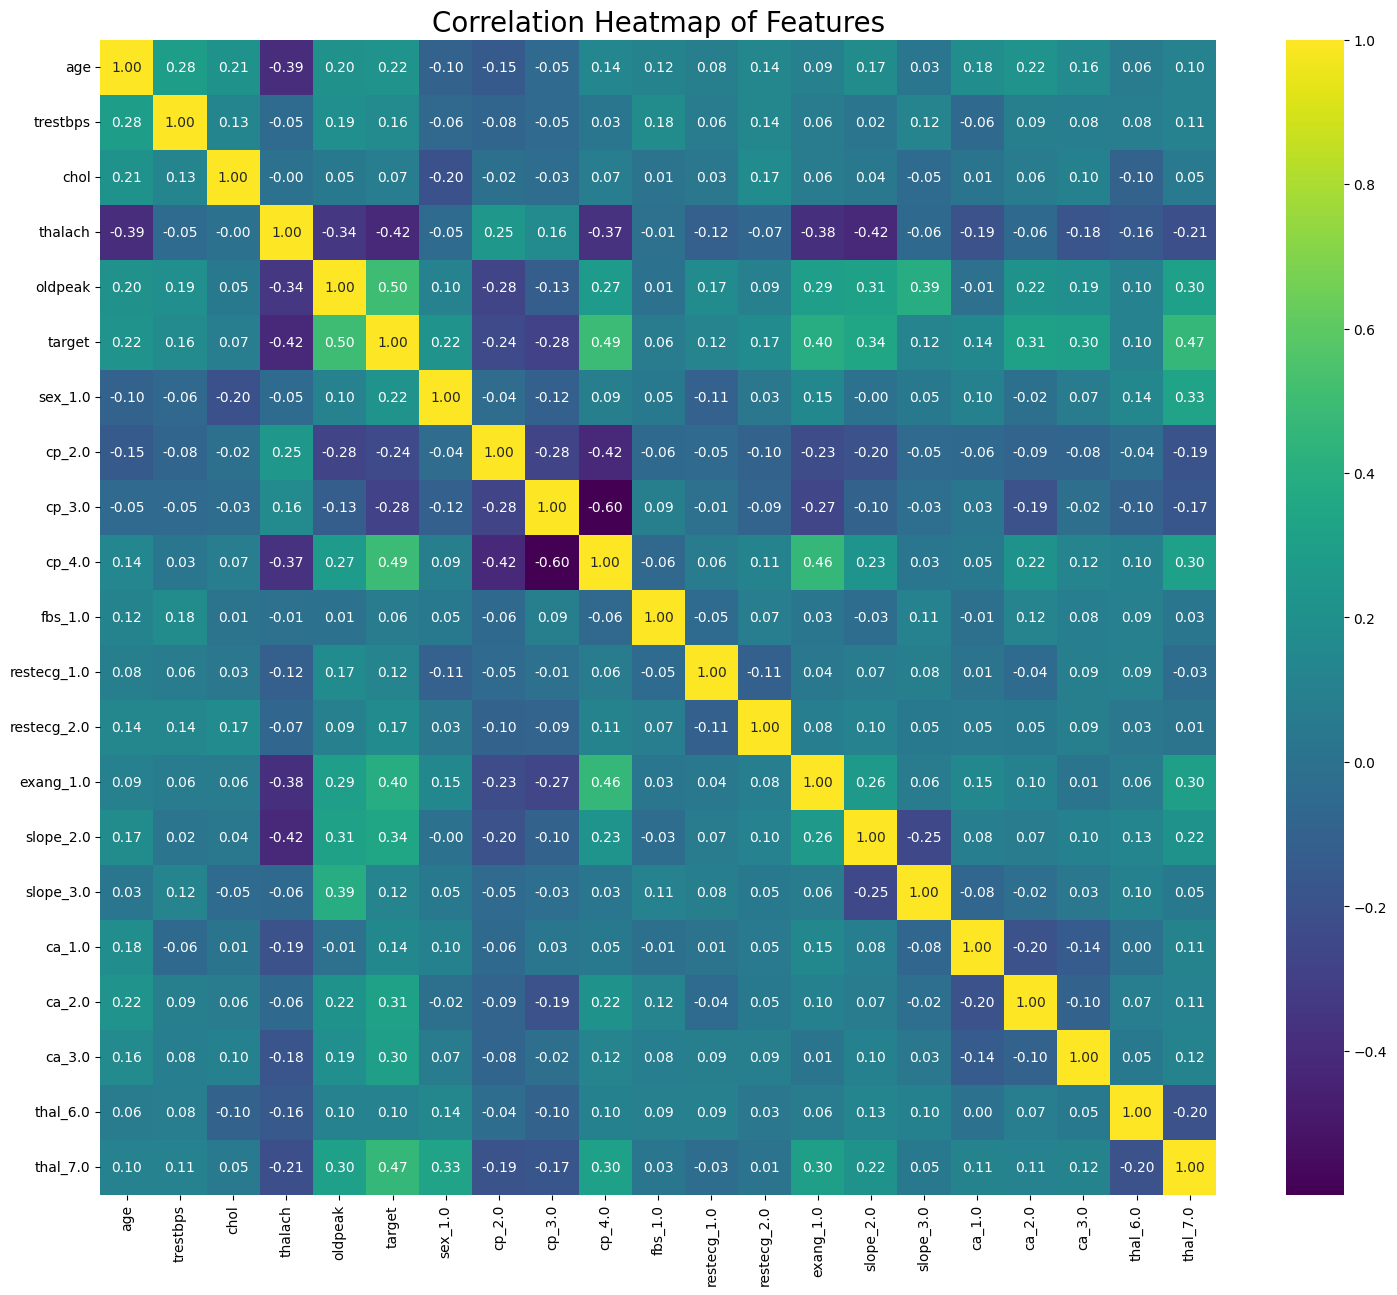


Displaying histograms for original numerical features (before scaling)...


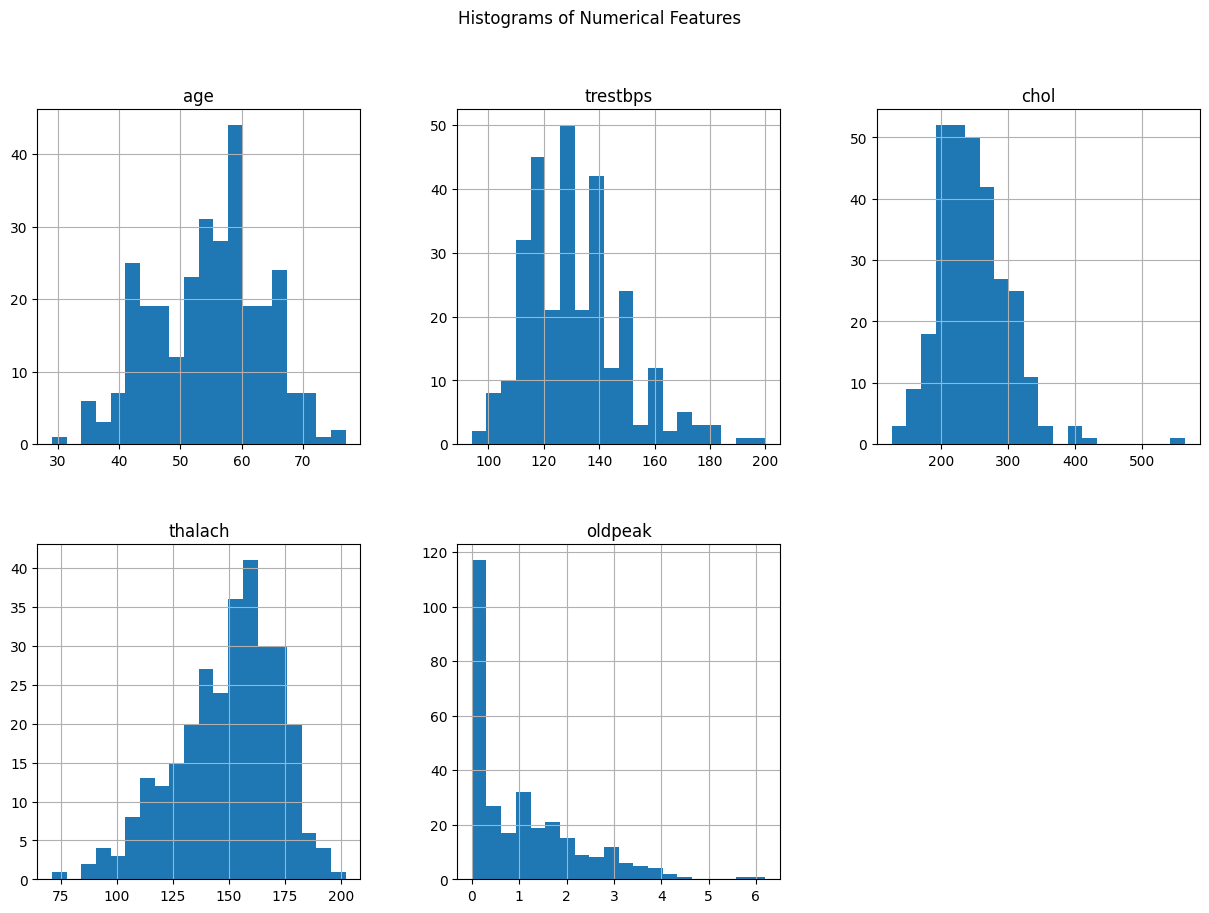

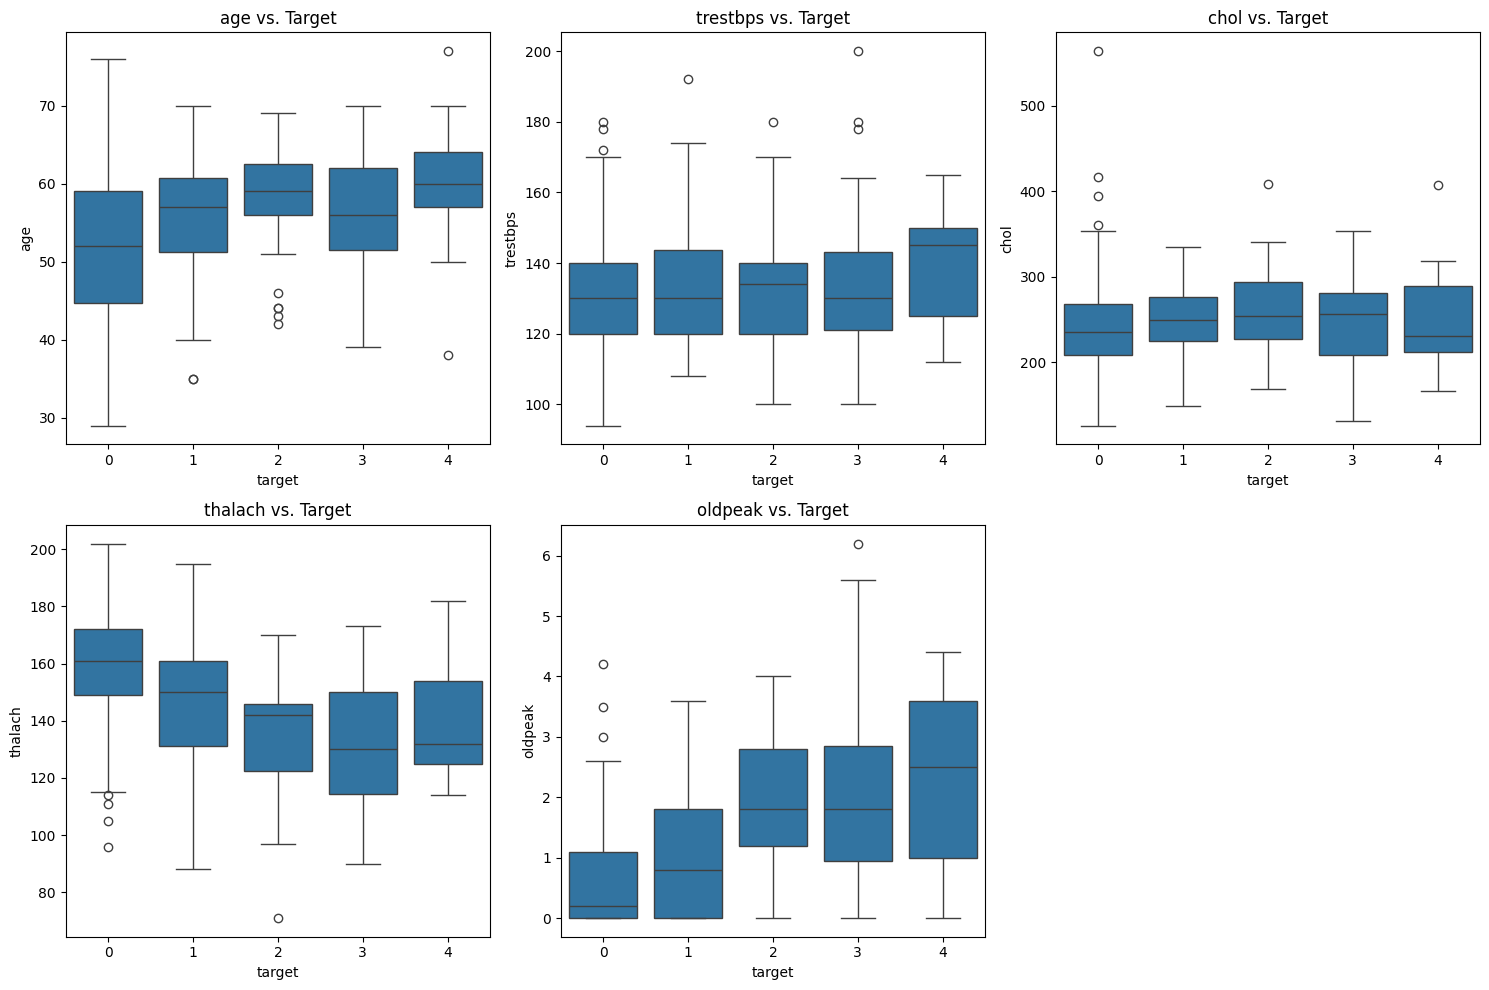


EDA visualizations have been generated.

Converting target to binary classification (0: No Disease, 1: Disease)...

Value counts of the new binary target:
target
0    164
1    139
Name: count, dtype: int64
Target variable distribution:
target
0    54.125413
1    45.874587
Name: proportion, dtype: float64

Data preprocessing and cleaning complete.
Cleaned dataset saved to 'cleaned_heart_disease.csv'.


In [28]:

print("\nStep 5: Conducting Exploratory Data Analysis (EDA)...")

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=20)
plt.show()

print("\nDisplaying histograms for original numerical features (before scaling)...")

try:
    df_eda = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
except FileNotFoundError:
    df_eda = pd.read_csv(url, header=None, names=column_names)
df_eda.replace('?', np.nan, inplace=True)
df_eda.dropna(inplace=True) 
for col in ['ca', 'thal']:
    df_eda[col] = pd.to_numeric(df_eda[col])

df_eda[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df_eda)
    plt.title(f'{col} vs. Target')
plt.tight_layout()
plt.show()

print("\nEDA visualizations have been generated.")

print("\nConverting target to binary classification (0: No Disease, 1: Disease)...")
df['target'] = (df['target'] > 0).astype(int)

print("\nValue counts of the new binary target:")
print(df['target'].value_counts())

distribution = df['target'].value_counts(normalize=True) * 100
print("Target variable distribution:")
print(distribution)


print("\nData preprocessing and cleaning complete.")
df.to_csv('cleaned_heart_disease.csv', index=False)
print("Cleaned dataset saved to 'cleaned_heart_disease.csv'.")